# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Método de Eliminação de gauss

In [ ]:
def gauss_elimination_with_partial_pivoting(A, b):
    n = len(b)
    AugmentedMatrix = np.column_stack((A, b))

    for i in range(n):
        max_row = i
        for k in range(i+1, n):
            if abs(AugmentedMatrix[k, i]) > abs(AugmentedMatrix[max_row, i]):
                max_row = k
        if max_row != i:
            AugmentedMatrix[[i, max_row]] = AugmentedMatrix[[max_row, i]]
        for k in range(i+1, n):
            factor = AugmentedMatrix[k, i] / AugmentedMatrix[i, i]
            AugmentedMatrix[k, i:] -= factor * AugmentedMatrix[i, i:]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (AugmentedMatrix[i, -1] - np.dot(AugmentedMatrix[i, i+1:n], x[i+1:])) / AugmentedMatrix[i, i]

    return x



# Método de Fatoração de LU

In [ ]:
def lu_factorization(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range(n):
        L[i][i] = 1

    for i in range(n):
        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
        for j in range(i+1, n):
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]

    return L, U

def forward_substitution(L, b):
    n = len(L)
    y = np.linalg.solve(L, b)

    return y

def backward_substitution(U, y):
    n = len(U)
    x = np.linalg.solve(U, y)

    return x

# Método de Cholesky

In [ ]:
def cholesky_decomposition(matrix):
    n = len(matrix)
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                L[i][j] = np.sqrt(matrix[i][i] - sum(L[i][k] ** 2 for k in range(j)))
            else:
                L[i][j] = (1.0 / L[j][j]) * (matrix[i][j] - sum(L[i][k] * L[j][k] for k in range(j)))

    return L

def is_definite_positive(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

# Método de Gauss_Jacobi

In [ ]:
def gauss_jacobi(coefficients, constants, epsilon, max_iterations=1000):
    n = len(constants)
    x = [0.0] * n
    x_new = [0.0] * n
    iteration = 0

    while iteration < max_iterations:
        max_error = 0.0

        for i in range(n):
            sum_term = 0.0
            for j in range(n):
                if i != j:
                    sum_term += coefficients[i][j] * x[j]

            x_new[i] = (constants[i] - sum_term) / coefficients[i][i]

            error = abs(x_new[i] - x[i])
            if error > max_error:
                max_error = error

        if max_error < epsilon:
            break

        x = x_new.copy()
        iteration += 1

    return x_new

# Método de Gauss_Seidel

In [ ]:
def is_diagonally_dominant(A):
    n = len(A)
    for i in range(n):
        diag = abs(A[i][i])
        row_sum = sum(abs(A[i][j]) for j in range(n) if j != i)
        if diag <= row_sum:
            return False
    return True


def gauss_seidel(n, A, b, Toler, IterMax=1000):
    if not is_diagonally_dominant(A):
        return [], 0, 1

    info = 0
    Iter = 0
    x = [0.0] * n
    v = x.copy()

    for i in range(n):
        x[i] = b[i] / A[i][i]

    while Iter < IterMax:
        Iter += 1
        NormaNum = 0.0
        NormaDen = 0.0

        for i in range(n):
            soma = 0.0
            for j in range(n):
                if i != j:
                    soma += A[i][j] * x[j]
            v[i] = x[i]
            x[i] = (b[i] - soma) / A[i][i]
            t = abs(v[i] - x[i])
            if t > NormaNum:
                NormaNum = t
            if abs(x[i]) > NormaDen:
                NormaDen = abs(x[i])

        NormaRel = NormaNum / (NormaDen + 1e-10)
        if NormaRel <= Toler:
            break

    if NormaRel <= Toler:
        info = 0
    else:
        info = 1

    return x, Iter, info


# Método para aplicar gráfico questao 4

In [ ]:

def Graf():
  A = np.array([[1.05, 2.05], [1.1, 2.0]])
  b = np.array([5.15, 5.1])

  result = np.linalg.solve(A, b)
  x1, x2 = result

  x = np.linspace(0, 5, 100)
  eq1 = (5.15 - 1.05 * x) / 2.05
  eq2 = (5.1 - 1.1 * x) / 2.0

  plt.figure(figsize=(8, 6))
  plt.plot(x, eq1, label='1,05x1 + 2,05x2 = 5,15')
  plt.plot(x, eq2, label='1,1x1 + 2,0x2 = 5,1')
  plt.scatter(x1, x2, color='red', label=f'Solução (x1, x2) = ({x1:.2f}, {x2:.2f})')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.grid(True)
  plt.title('Gráfico do Sistema de Equações')
  plt.show()


# 1.  Resolver os sistemas lineares pelos métodos Fatoração LU e Cholesky, se possível.

Caso seja possível aplicar o método de Fatoração LU, encontre as matrizes L, U e o
vetor solução. E, caso seja possível aplicar o método de Fatoração de Cholesky,
encontre as matrizes G, $G^T$ e o vetor solução


---


$Sistema^1$
\begin{align*}
x_1 - 2x_2 + x_3 &= 0 \\
2x_1 - 2x_2 + x_3 &= 1 \\
3x_1 - 2x_2 - 2x_3 &= -1
\end{align*}


---
$Sistema^2$
\begin{align*}
5x_1 + 2x_2 + x_3 &= -12 \\
-x_1 + 4x_2 + 2x_3 &= 20 \\
2x_1 - 3x_2 + 10x_3 &= 3
\end{align*}


In [ ]:
print("Utilizando o Método de Fatoração LU")
Arredond = 2
A = np.array([[1, -2, 1],
              [2, -2, 1],
              [3, -2, -2]])
b = np.array([[0],
              [1],
              [-1]])

L, U = lu_factorization(A)
y = forward_substitution(L, b)
x = backward_substitution(U, y)

print("Resultados Sistema 1")
print("L:")
print(L)
print("U:")
print(U)
print("Solução:")
print(x)
print("\n\n")
A = np.array([[5, 2, 1],
              [-1, 4, 2],
              [2, -3, 10]])
b = np.array([[-12],
              [20],
              [3]])
L, U = lu_factorization(A)
y = forward_substitution(L, b)
x = backward_substitution(U, y)
print("Resultados Sistema 2")
print("L:")
print(L)
print("U:")
print(U)
print("Solução:")
print(x)

print("\n\nUtilizando o Método de Fatoração de Cholesky")
print("Resultados Sistema 1")
A = np.array([[1, -2, 1],
              [2, -2, 1],
              [3, -2, -2]])

b = np.array([[0],
              [1],
              [-1]])

if not is_definite_positive(A):
    print("A matriz A não é definida positiva. O método de Cholesky não pode ser aplicado.")
else:
    G = cholesky_decomposition(A)
    y = np.linalg.solve(G, b)
    x = np.linalg.solve(G.T, y)
    print("Matriz G:")
    print(G)
    print("\n")
    print("Matriz G.T:")
    print(G.T)
    print("\n")
    print("Vetor y:")
    print(y)
    print("\n")
    print("Vetor x:")
    print(x)
print("\n\nResultados Sistema 2")
A = np.array([[5, 2, 1],
              [-1, 4, 2],
              [2, -3, 10]])

b = np.array([[-12],
              [20],
              [3]])

if not is_definite_positive(A):
    print("A matriz A não é definida positiva. O método de Cholesky não pode ser aplicado.")
else:
    G = cholesky_decomposition(A)
    y = np.linalg.solve(G, b)
    x = np.linalg.solve(G.T, y)
    print("\n\n\nSolução do sistema:")
    print("Matriz G:")
    print(G)
    print("Matriz G Transposta:")
    print(G.T)
    print("Vetor Solução:")
    print(x)

Utilizando o Método de Fatoração LU
Resultados Sistema 1
L:
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]
U:
[[ 1. -2.  1.]
 [ 0.  2. -1.]
 [ 0.  0. -3.]]
Solução:
[[1.]
 [1.]
 [1.]]



Resultados Sistema 2
L:
[[ 1.          0.          0.        ]
 [-0.2         1.          0.        ]
 [ 0.4        -0.86363636  1.        ]]
U:
[[ 5.   2.   1. ]
 [ 0.   4.4  2.2]
 [ 0.   0.  11.5]]
Solução:
[[-4.]
 [ 3.]
 [ 2.]]


Utilizando o Método de Fatoração de Cholesky
Resultados Sistema 1
A matriz A não é definida positiva. O método de Cholesky não pode ser aplicado.


Resultados Sistema 2



Solução do sistema:
Matriz G:
[[ 2.23606798  0.          0.        ]
 [-0.4472136   1.94935887  0.        ]
 [ 0.89442719 -1.33377186  2.7241609 ]]
Matriz G Transposta:
[[ 2.23606798 -0.4472136   0.89442719]
 [ 0.          1.94935887 -1.33377186]
 [ 0.          0.          2.7241609 ]]
Vetor Solução:
[[-2.17730496]
 [ 6.46099291]
 [ 2.67375887]]


# 2.
No dia dos namorados,	dois rapazes pretendem comprar	um ramo	de flores, com rosas e tulipas, para oferecer às respectivas namoradas.	Considere	x1	o	número de	rosas	e	x2 o número	de	tulipas	de	cada	ramo.

O	primeiro rapaz decidi comprar	o	ramo	"Mil	pétalas"	que	cobra	por	cada	rosa	2
reais	e	por	cada	tulipa	2	reais,	gastando	10	reais.

O	segundo	rapaz	decide	comprar	o	ramo	"Tudo	em	flor",	mas	a	florista	ainda	está
indecisa	no	preço	que	irá cobrar	por	cada	rosa	(considere	esse	preço	igual	a	"k")
cobrando-lhe	3	reais	por	cada	tulipa,	ficando	o	ramo	por	13	reais.

a)	Coloque	o	problema	na	forma	de	um	sistema	de	equações	lineares,	em	função
de	x1,	x2	e	k.

b)	 Calcule	 justificando,	 o	 valor	 de	 k, de	 forma	 a	 garantir	 a	 convergência	 do
método	 iterativo	 de	 Gauss-Jacobi na	 resolução	 do	 sistema	 (use	 apenas	 as
condições	suficientes	de	convergência	baseadas	na	matriz	dos	coeficientes,	A).

In [ ]:
print("a) Coloque o problema na forma de um sistema de equações lineares, em função de x1, x2 e k.\n")
print("2x + 2y = 10 => Mil petalas")
print("kx + 3y = 13 => Tudo em flor")
print("a) Calcule justificando, o valor de k,\nde forma a garantir a convergência do método iterativo de Gauss-Jacobi\n")
print("K = 2")
k = 2
A = np.array([[2, 2],
              [k, 3]], dtype=float)
b = np.array([10, 13], dtype=float)

epsilon = 0.05

solution = gauss_jacobi(A, b, epsilon)

print(f"Solução encontrada: {np.round(solution[0], 4)} e {np.round(solution[1], 4)}")

a) Coloque o problema na forma de um sistema de equações lineares, em função de x1, x2 e k.

2x + 2y = 10 => Mil petalas
kx + 3y = 13 => Tudo em flor
a) Calcule justificando, o valor de k,
de forma a garantir a convergência do método iterativo de Gauss-Jacobi

K = 2
Solução encontrada: 2.0231 e 3.0103


# 3. Uma equipe de três paraquedistas ligados por uma corda de peso desprezável é lançada em queda livre a uma velocidade v = 5 m/s

Considere	os	seguintes	dados:

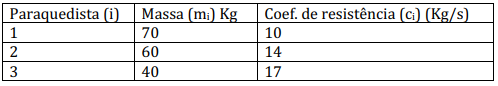

O sistema linear resultante permite calcular a tensão	em cada secção da corda (R e T) e a aceleração da equipe (a).

\begin{align*}
m_1.g - c_1.v - T &= m_1.a \\
m_2.g - c_2.v + T - R &= m_2.a \\
m_2.g - c_3.v     + R  &= m_3.a
\end{align*}
(considere g = 9.8 m/s2).    

O que poderia dizer acerca da convergência do método iterativo de Gauss-Seidel quando aplicado ao sistema? Justifique.


In [ ]:
A = [[-70, -1, 0], [-1, -60, 1], [1, -40, 0]]
b = [-636, -518, -307]

n = len(b)
Toler = 0.05
IterMax = 100

solution, iterations, info = gauss_seidel(n, A, b, Toler, IterMax)

if info == 0:
    print("Solução:")
    for i, x_i in enumerate(solution):
        print(f"x{i + 1} = {x_i}")

    print(f"Interações: {iterations}")
else:
    print("Matriz não é diagonal dominante. O método de seidel não pode ser aplicado.")


Matriz não é diagonal dominante. O método de seidel não pode ser aplicado.


# Conclusões
As condições de convergência para o método de Gauss-Seidel não foram atendidadas pela matriz. Para ocorrer a convergência era necessário que a matriz fosse diagonalmente dominante.

A matriz é diagonalmente dominante quando atende ao menos o critério das linhas ou o das colunas sendo o das linhas obtido através da máximo valor da soma de todos os valores em módulo de cada linha, e o das colunas a mesma coisa só que para as colunas.

# 4.  Resolva o seguinte sistema de equações :

\begin{align*}
1,05x_1 + 2,05x_2 &= 5,15 \\
1,1x_1 + 2,0x_2 &= 5,1
\end{align*}
---
a)Graficamente.

b)Por Eliminação de Gauss com Pivotamento Parcial, de modo exato.

c)Por Eliminação de Gauss com Pivotamento Parcial, mas com 3 algarismos
significativos. Utilize aritmética de arredondamento.

d)Justifique os resultados obtidos.


a) Gráficamente: 


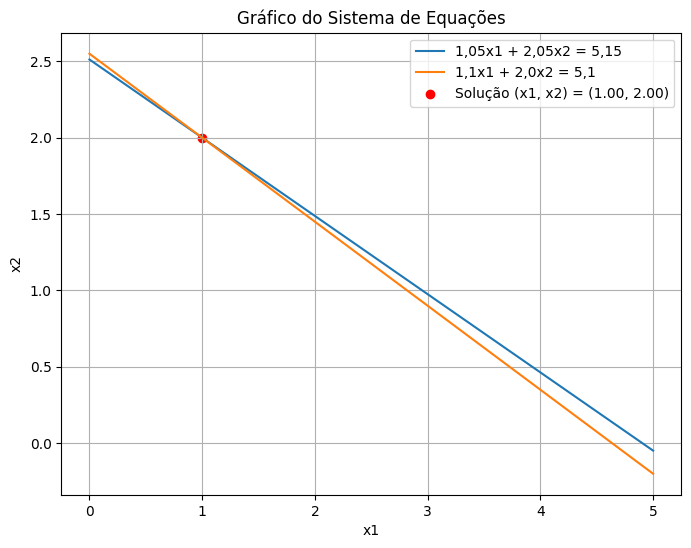


b) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato. 
b) Solução do sistema de modo exato:  [0.9999999999999827, 2.0000000000000093]
c) Solução do sistema com 3 algarismos:  [1.0, 2.0]


In [ ]:
print("\na) Gráficamente: ")
Graf()
print("\nb) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato. ")

A = np.array([[1.05, 2.05],
              [1.1, 2.0]], dtype=float)
b = np.array([5.15, 5.1], dtype=float)

x = gauss_elimination_with_partial_pivoting(A, b)
x = [np.round(xi, 20) for xi in x]
print("b) Solução do sistema de modo exato: ", x)
x = [np.round(xi, 3) for xi in x]
print("c) Solução do sistema com 3 algarismos: ", x)

#Conclusão
O Método de pivotamento Parcial é uma técnica que consiste em substituir linhas durante o processo de Eliminação de Gauss, com o objetivo de evitar divisões por valores próximos a zero e reduzir a acumulação de erros de arredondamento. Essa abordagem contribui para aprimorar a precisão numérica do algoritmo, especialmente quando a matriz contém elementos de magnitude reduzida na sua diagonal principal.